<a href="https://colab.research.google.com/github/AnsonYams/PROJECT5/blob/main/Copy_of_DATA_301_Lab_1A_YOUR_NAMES_HERE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

1. First digit of 1: 30%    
First digit of 9: 5% </br>
2. Last digit of 1: 20%     
Last digit of 9: 10%

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [20]:
# ENTER YOUR CODE HERE.
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_snp = pd.read_csv(data_dir + "sp500.csv")
df_snp.set_index(["Name"], inplace=True)
df_snp

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


The unit of oberservation is every stock in the S&P 500. It makes sense to use the name of the stock as the index.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

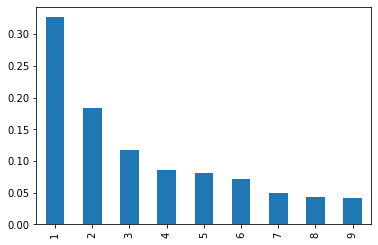

In [36]:
# ENTER YOUR CODE HERE.
vol = df_snp["volume"].astype(str)
digits = vol.str.extract("([0-9])",expand=False)
percents = digits.value_counts(normalize=True)
percents.plot.bar()

My predictions were actually very close to the data seen in the graph. 1 was the first digit 32.7% of the time and 9 was the first digit 0.04% of the time.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

In [37]:
# ENTER YOUR CODE HERE.
digits = vol.str.extract("([0-9]$)",expand=False)
percents = digits.value_counts(normalize=True)
percents.sort_index()

0    0.102970
1    0.104950
2    0.110891
3    0.095050
4    0.079208
5    0.087129
6    0.100990
7    0.102970
8    0.110891
9    0.104950
Name: volume, dtype: float64

My prediction for 1 being the last digit was off by 10% but my prediction for 9 being the last digit was very close. 1 was the last digit 10% of the time and 9 was the last digit 10% of the time.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

In [46]:
# ENTER YOUR CODE HERE.
close = df_snp["close"].astype(str)
digits = close.str.extract("([0-9])",expand=False)
percents = digits.value_counts(normalize=True)
percents

1    0.338614
2    0.108911
3    0.102970
6    0.095050
4    0.085149
7    0.085149
5    0.077228
8    0.055446
9    0.051485
Name: close, dtype: float64

The distribution of first digits for the close column is very similar to the distribution of the volume column. 1 was the first digit 33.9% of the time and 9 was the first digit 5.1% of the time.